<a href="https://colab.research.google.com/github/j3rsey/section_project/blob/main/ai_04_%EA%B3%BD%EC%83%81%ED%98%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv 
!rm ~/.cache/matplotlib -rf 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

v_games = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv')
v_games = v_games.drop('Unnamed: 0', axis = 1)
v_games

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [76]:
#결측치 확인, 결측치 제거
v_games.isnull().sum()

# Year Genre Publisher 결측치 전처리, sales 단위통일

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [77]:
#year column에 있는 데미지입은 데이터 처리해주기
Year =[]
for i in v_games['Year']:
  if i <= 20:
    Year.append(2000 + i)
  elif i <= 99:
    Year.append(1900 + i)
  else:
    Year.append(i)
Year


[2008.0,
 2009.0,
 2010.0,
 2010.0,
 2010.0,
 2005.0,
 2011.0,
 2005.0,
 2007.0,
 2011.0,
 2001.0,
 2003.0,
 2008.0,
 2005.0,
 2006.0,
 2009.0,
 2003.0,
 2014.0,
 2015.0,
 2009.0,
 2002.0,
 1997.0,
 2005.0,
 2014.0,
 2013.0,
 2002.0,
 1996.0,
 2011.0,
 2004.0,
 2000.0,
 2011.0,
 nan,
 2006.0,
 2015.0,
 2004.0,
 2009.0,
 2005.0,
 1984.0,
 2008.0,
 2006.0,
 2000.0,
 2004.0,
 2007.0,
 2008.0,
 2013.0,
 2015.0,
 1998.0,
 2002.0,
 2008.0,
 2009.0,
 2005.0,
 2009.0,
 2001.0,
 2009.0,
 2009.0,
 2010.0,
 2016.0,
 2010.0,
 2010.0,
 1985.0,
 2006.0,
 2008.0,
 2010.0,
 2011.0,
 2004.0,
 1998.0,
 2011.0,
 2004.0,
 2014.0,
 2010.0,
 1999.0,
 2007.0,
 2015.0,
 2003.0,
 2009.0,
 2010.0,
 1985.0,
 2000.0,
 2007.0,
 2008.0,
 2005.0,
 1997.0,
 1997.0,
 2003.0,
 2000.0,
 2003.0,
 1995.0,
 2005.0,
 2010.0,
 1999.0,
 2010.0,
 2005.0,
 2011.0,
 2014.0,
 2003.0,
 1998.0,
 2011.0,
 2001.0,
 2010.0,
 1993.0,
 2014.0,
 2009.0,
 2002.0,
 2004.0,
 2005.0,
 2007.0,
 2005.0,
 2000.0,
 2016.0,
 nan,
 2012.0,
 2007.0

In [78]:
v_games = v_games.dropna(subset = ['Year'], axis = 0)
v_games

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [79]:
v_games['Year'] = pd.Series(Year) 
v_games['Year'] = v_games['Year'].astype(int)
v_games['Year']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0        2008
1        2009
2        2010
3        2010
4        2010
         ... 
16593    2006
16594    2005
16595    2015
16596    2013
16597    1996
Name: Year, Length: 16327, dtype: int64

In [80]:
#genre 결측치 제거
v_games = v_games.dropna(subset = ['Genre'], axis = 0)


In [81]:
#publisher 결측치 제거
v_games = v_games.dropna(subset = ['Publisher'], axis = 0)
v_games

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [82]:
v_games.isnull().sum()
# 모든 손상된 데이터, 결측치를 해결완료.

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [83]:
#drop 을 하면서 꼬여버린 index를 재설정하기.
v_games = v_games.reset_index()
v_games = v_games.drop('index',axis = 1)
v_games

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
16237,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16238,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16239,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [84]:
#단위변환함수
def convert(column):
  for i in range(len(column)):
    if (str(type(column[i]))=="<class 'str'>"):
      if (column[i].find('K') != -1):
        column[i] = re.sub('K','',column[i])
        column[i] = float(column[i])
        column[i] *= 0.001
      elif (column[i].find('M') != -1):
        column[i] = re.sub('M','',column[i])
        column[i] = float(column[i])
  return column

In [85]:
v_games['NA_Sales'] = pd.to_numeric(convert(v_games['NA_Sales']))
v_games['EU_Sales'] = pd.to_numeric(convert(v_games['EU_Sales']))
v_games['JP_Sales'] = pd.to_numeric(convert(v_games['JP_Sales']))
v_games['Other_Sales'] = pd.to_numeric(convert(v_games['Other_Sales']))
v_games

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A valu

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16237,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16238,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16239,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [86]:
v_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16241 entries, 0 to 16240
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  int64  
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  float64
 6   EU_Sales     16241 non-null  float64
 7   JP_Sales     16241 non-null  float64
 8   Other_Sales  16241 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.1+ MB


In [87]:
# 1.지역에 따라서 선호하는 게임 장르가 다를까?
# 2.연도별 게임의 트렌드가 있을까?
# 3.출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.

In [88]:
Genre = v_games['Genre']
NA_Sales = v_games['NA_Sales']
EU_Sales = v_games['EU_Sales']
JP_Sales = v_games['JP_Sales']
Other_Sales = v_games['Other_Sales']

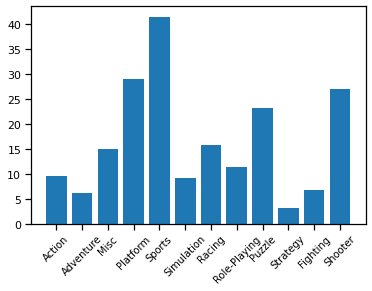

In [89]:
# 1.지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.

genre = Genre
value = NA_Sales

plt.bar(genre, value)
plt.tick_params(axis='x', which='major', labelsize = 10, rotation = 45)
plt.show()


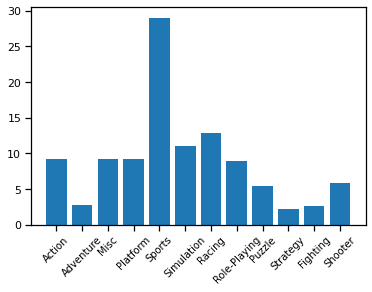

In [90]:
genre = Genre
value = EU_Sales

plt.bar(genre, value)
plt.tick_params(axis='x', which='major', labelsize = 10, rotation = 45)
plt.show()



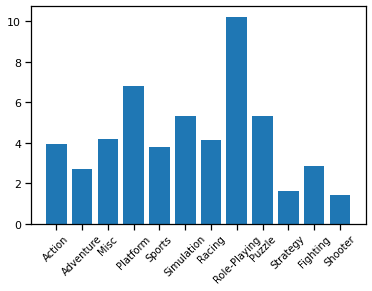

In [91]:
genre = Genre
value = JP_Sales

plt.bar(genre, value)
plt.tick_params(axis='x', which='major', labelsize = 10, rotation = 45)
plt.show()


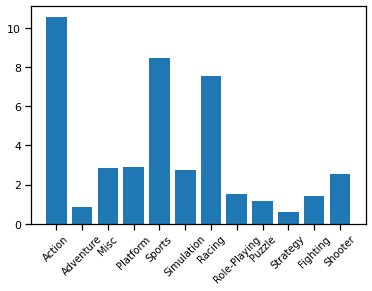

In [92]:
genre = Genre
value = Other_Sales

plt.bar(genre, value)
plt.tick_params(axis='x', which='major', labelsize = 10, rotation = 45)
plt.show()


지역에 따라 
NA는 스포츠, 플랫폼, 슈팅게임, 퍼즐게임이 강세를 보이지만, 그중에서 스포츠가 뚜렷한 강세를 가진다.

EU는 NA와 비슷하게 스포츠가 뚜렷한 강세를 가지지만, NA는 플랫폼, 슈팅게임, 퍼즐 순으로 근소한 점유율 차이를 보이면 스포츠분야를 위협하고 있지만, 
EU는 스포츠가 독주하는 모양이고 나머지는 비슷비슷한 점유율을 보인다.

서구권에서는 스포츠부분의 게임이 강세인 것과 다르게, 일본에서는 롤플레잉 장르와, 플랫폼 장르가 강세를 보인다.

그 셋 지역을 제외하고 다른 지역은 액션이 강세이고 그 뒤로 스포츠와 레이싱이 주를 이룬다.

이것을 보아 지역에 따라 선호하는 게임의 장르가 다르다는 것을 알 수 있고, 비슷한 문화권에따라 선호되는 장르가 비슷하다는 것 또한 알 수 있다.

In [ ]:
# 2. 연도별로 게임 트렌드가 있을까?

In [93]:
Total_Sales = []
for i in range(16241):
  Total_Sales.append(v_games['NA_Sales'][i] + v_games['EU_Sales'][i] + v_games['JP_Sales'][i] + v_games['Other_Sales'][i])

v_games ['Total_Sales'] = Total_Sales
v_games

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16237,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16238,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16239,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


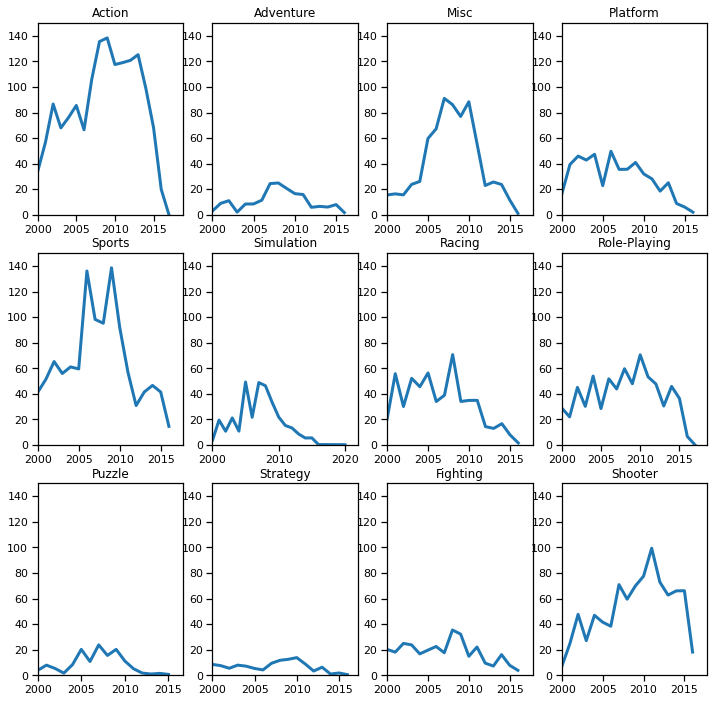

In [94]:
sns.set_context('notebook')

genre = list(v_games['Genre'].unique())
fig, ax = plt.subplots(3,4, figsize = (12, 12))

for i, gen in  enumerate(genre):
  if i <= 3:
    x = 0
  elif i <= 7:
    x = 1
  elif i <= 11:
    x = 2

  y = i % 4

  df = v_games[v_games['Genre']==gen].groupby('Year')['Total_Sales'].sum()
  ax[(x, y)].plot(df,lw=3)
  ax[(x, y)].set_title(gen)
  ax[(x, y)].set_ylim(0, 150)
  ax[(x, y)].set_xlim(2000,)

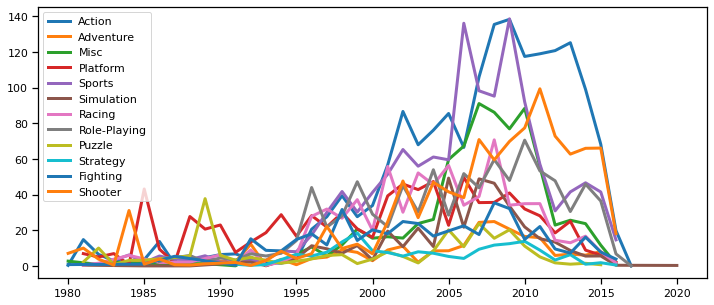

In [95]:
series_list= ['Action','Adventure','Misc','Platform','Sports','Simulation','Racing','Role-Playing','Puzzle','Strategy','Fighting','Shooter']
fig, ax = plt.subplots(figsize = (12, 5))

for i in series_list:
  ax.plot(v_games[v_games['Genre']==i].groupby('Year')['Total_Sales'].sum(),label = i,lw = 3)

plt.legend()

게임시장의 초기에는 플랫폼 게임과 슈팅 게임이 강세였지만, 집집마다 개인용 컴퓨터의 보급 이후 플랫폼 게임은 전년도 대비 비약적 상승을 더이상 이루지 못하고 비슷비슷한 추세를 급락 급등을 반복하며 반복하게 된다.

이후 컴퓨터의 보급화와 게임그래픽의 상승이 맞물려 액션장르와 특히스포츠 장르, 어드벤쳐 장르가 주를 이루고 있다. 매 년 마다 트렌드가 되는 게임들은 있지만, 2000년대 들어서는 액션장르, 스포츠 장르 2강체제로 보인다.

In [ ]:
# 3.출고량이 높은 게임에 대한 분석 및 시각화

In [96]:
best10_sales = v_games.sort_values('Total_Sales', ascending=False).iloc[:10]
best10_sales

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2855,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
4113,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
12316,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3288,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7673,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
1187,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6796,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
2959,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
16176,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
10280,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [97]:
best10_sales_platform = pd.DataFrame(best10_sales.groupby('Platform')['Total_Sales'].sum()).reset_index()
best10_sales_platform

,Platform,Total_Sales
0,DS,30.01
1,GB,61.64
2,NES,68.55
3,Wii,209.19


Text(0.5, 1.0, '10 best-selling games by platform')

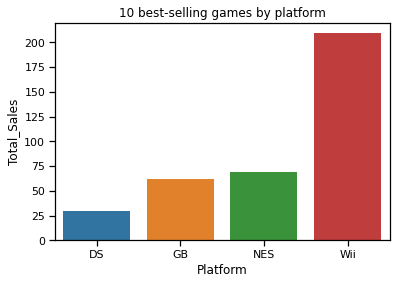

In [98]:
sns.set_context('notebook')
sns.barplot(x =best10_sales_platform['Platform'], y = best10_sales_platform['Total_Sales'])
plt.title("10 best-selling games by platform")

Text(0.5, 1.0, '10 best-selling games by Genre')

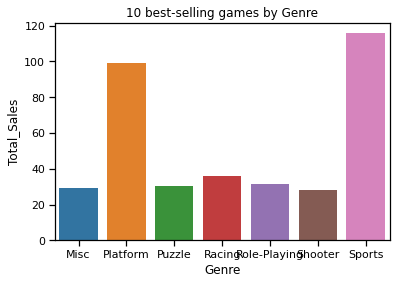

In [99]:
best10_sales_genre = pd.DataFrame(best10_sales.groupby('Genre')['Total_Sales'].sum()).reset_index()
best10_sales_genre

sns.set_context('notebook')
sns.barplot(x =best10_sales_genre['Genre'], y = best10_sales_genre['Total_Sales'])
plt.title("10 best-selling games by Genre")

In [100]:
best10_sales = pd.DataFrame(best10_sales.groupby(region)['Total_Sales'].sum()).reset_index()
best10_sales = best10_sales.sort_values('Total_Sales',ascending = False).reset_index()
best10_sales.drop('index', axis =1,inplace=True)
best10_sales

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,41.49,29.02,3.77,8.46,82.74
1,29.08,3.58,6.81,0.77,40.24
2,15.85,12.88,3.79,3.31,35.83
3,15.75,11.01,3.28,2.96,33.00
4,11.27,8.89,10.22,1.00,31.38
5,23.20,2.26,4.22,0.58,30.26
6,11.38,9.23,6.50,2.90,30.01
7,14.03,9.20,2.93,2.85,29.01
8,14.59,7.06,4.70,2.26,28.61
9,26.93,0.63,0.28,0.47,28.31


In [101]:
best10_sales_region = pd.melt(best10_sales, id_vars=['Total_Sales'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], value_name='Sales').sort_values('Total_Sales').reset_index()
best10_sales_region = best10_sales_region.drop('index',axis =1)
best10_sales_region = best10_sales_region.sort_index(ascending=False).reset_index()
best10_sales_region = best10_sales_region.drop('index',axis =1) 
best10_sales_region

,Total_Sales,variable,Sales
0,82.74,NA_Sales,41.49
1,82.74,EU_Sales,29.02
2,82.74,JP_Sales,3.77
3,82.74,Other_Sales,8.46
4,40.24,Other_Sales,0.77
5,40.24,EU_Sales,3.58
6,40.24,NA_Sales,29.08
7,40.24,JP_Sales,6.81
8,35.83,Other_Sales,3.31
9,35.83,JP_Sales,3.79


Text(0.5, 1.0, '10 best-selling games by region')

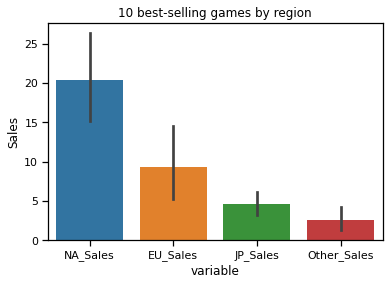

In [102]:
sns.set_context('notebook')
sns.barplot(x = best10_sales_region['variable'], y =  best10_sales_region['Sales'])
plt.title('10 best-selling games by region')